# Part 3 Assignment: Regression Model

## Import Libraries & Load Data

In [1]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('CE802_P3_Data.csv')
test_df = pd.read_csv('CE802_P3_Test.csv')

## Data Summary Statistics

In [4]:
df

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,6.57,2,1.42,119.73,-3.34,Low,7.83,-4506.63,-16448.13,-214.64,6.96,-29.12,6,USA,3835.29,660.06,288.54
1,17.64,2,0.70,102.48,-9.77,High,2.43,-3326.25,-15865.93,-199.36,9.20,-30.42,4,UK,4130.94,683.22,1075.23
2,6.06,1,14.72,249.60,-2.26,Very high,4.29,-2206.02,-11705.56,-149.86,12.97,-21.58,16,USA,5305.89,769.83,1722.09
3,2.07,3,0.00,149.85,-0.99,High,3.50,-2798.73,-13815.70,-219.50,5.78,-38.10,10,Europe,2149.47,720.63,3376.78
4,18.99,5,1.92,26.67,-5.62,Low,3.10,-4357.92,-18105.59,-208.86,7.38,-7.06,6,Europe,5115.03,789.96,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,12.33,9,2.64,206.46,-3.44,High,6.73,-2566.77,-23124.56,-140.32,9.82,-38.42,8,Europe,3759.72,722.07,2952.31
1496,0.96,3,48.70,91.20,-3.68,Medium,3.46,-3142.26,-17738.33,-121.30,11.10,-31.12,8,UK,5409.42,987.69,0.00
1497,7.89,3,57.82,-65.46,-1.72,Medium,2.63,-1500.72,-15052.66,-253.74,6.19,-15.24,6,USA,4109.13,688.32,23.73
1498,3.75,5,59.36,78.69,-3.43,Low,2.28,-4507.05,-14998.52,-214.40,7.31,-28.96,8,Rest,4671.33,561.90,0.00


<AxesSubplot:xlabel='F14', ylabel='count'>

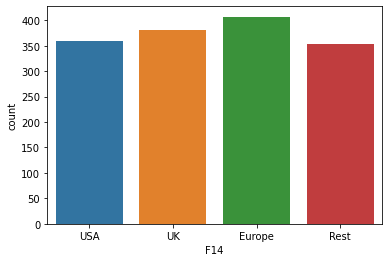

In [5]:
sns.countplot(x="F14", data=df)

<AxesSubplot:xlabel='F6', ylabel='count'>

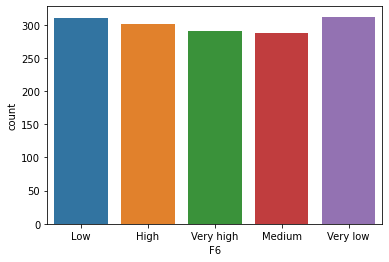

In [6]:
sns.countplot(x="F6", data=df)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1500 non-null   float64
 1   F2      1500 non-null   int64  
 2   F3      1500 non-null   float64
 3   F4      1500 non-null   float64
 4   F5      1500 non-null   float64
 5   F6      1500 non-null   object 
 6   F7      1500 non-null   float64
 7   F8      1500 non-null   float64
 8   F9      1500 non-null   float64
 9   F10     1500 non-null   float64
 10  F11     1500 non-null   float64
 11  F12     1500 non-null   float64
 12  F13     1500 non-null   int64  
 13  F14     1500 non-null   object 
 14  F15     1500 non-null   float64
 15  F16     1500 non-null   float64
 16  Target  1500 non-null   float64
dtypes: float64(13), int64(2), object(2)
memory usage: 199.3+ KB


## Exploring the Data (EDA)

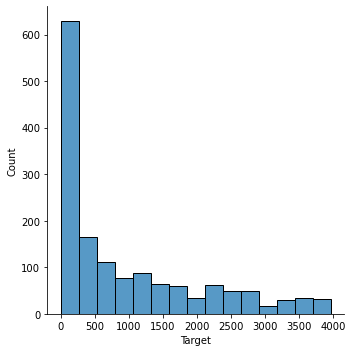

In [8]:
sns.displot(df, x="Target")

<AxesSubplot:>

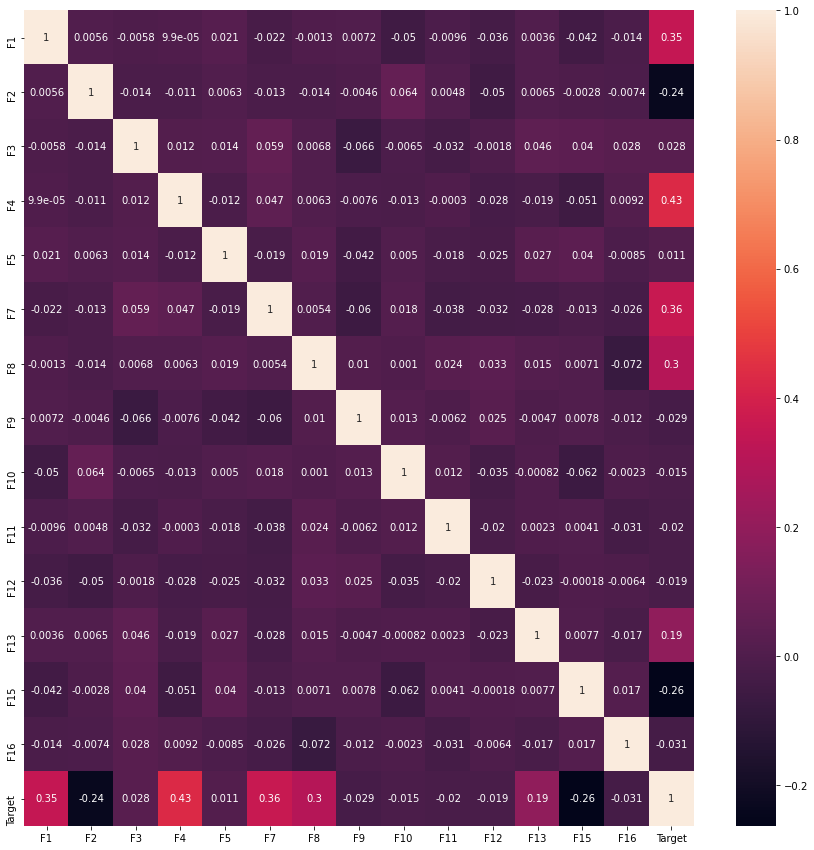

In [9]:
corr = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot= True)

## Pre-processing

In [10]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LinearRegression, Ridge, SGDRegressor, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, train_test_split, cross_validate
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsClassifier
from sklearn.svm import SVR, SVC
from sklearn.compose import ColumnTransformer


In [11]:
# categorise our inputs
ordinal_attribs = ['F6']
cat_attribs = ['F14']

#create column transformer to apply transformation methods
col_pipe = ColumnTransformer([
                                  ('ordinal', OrdinalEncoder(), ordinal_attribs),
                                  ('cat', OneHotEncoder(), cat_attribs)                       
])

# fit to our data set creating an array
col_array = col_pipe.fit_transform(df)

In [12]:
# combine our new array with our other inputs
col_new = pd.DataFrame(col_array)
df = pd.concat([df, col_new], axis=1)

# drop old columns
df.drop(labels=['F6', 'F14'], axis=1, inplace=True)

In [13]:
df

,F1,F2,F3,F4,F5,F7,F8,F9,F10,F11,F12,F13,F15,F16,Target,0,1,2,3,4
0,6.57,2,1.42,119.73,-3.34,7.83,-4506.63,-16448.13,-214.64,6.96,-29.12,6,3835.29,660.06,288.54,1.0,0.0,0.0,0.0,1.0
1,17.64,2,0.70,102.48,-9.77,2.43,-3326.25,-15865.93,-199.36,9.20,-30.42,4,4130.94,683.22,1075.23,0.0,0.0,0.0,1.0,0.0
2,6.06,1,14.72,249.60,-2.26,4.29,-2206.02,-11705.56,-149.86,12.97,-21.58,16,5305.89,769.83,1722.09,3.0,0.0,0.0,0.0,1.0
3,2.07,3,0.00,149.85,-0.99,3.50,-2798.73,-13815.70,-219.50,5.78,-38.10,10,2149.47,720.63,3376.78,0.0,1.0,0.0,0.0,0.0
4,18.99,5,1.92,26.67,-5.62,3.10,-4357.92,-18105.59,-208.86,7.38,-7.06,6,5115.03,789.96,0.00,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,12.33,9,2.64,206.46,-3.44,6.73,-2566.77,-23124.56,-140.32,9.82,-38.42,8,3759.72,722.07,2952.31,0.0,1.0,0.0,0.0,0.0
1496,0.96,3,48.70,91.20,-3.68,3.46,-3142.26,-17738.33,-121.30,11.10,-31.12,8,5409.42,987.69,0.00,2.0,0.0,0.0,1.0,0.0
1497,7.89,3,57.82,-65.46,-1.72,2.63,-1500.72,-15052.66,-253.74,6.19,-15.24,6,4109.13,688.32,23.73,2.0,0.0,0.0,0.0,1.0
1498,3.75,5,59.36,78.69,-3.43,2.28,-4507.05,-14998.52,-214.40,7.31,-28.96,8,4671.33,561.90,0.00,1.0,0.0,1.0,0.0,0.0


## Data Modelling

### Regression Method

In [14]:
# create input dataframe and output array
X = df.drop('Target', axis=1)
y = df['Target']

In [15]:
scaler = StandardScaler()

In [16]:
inner_cv = KFold(n_splits=3, shuffle=True, random_state=1)
outer_cv = KFold(n_splits=5, shuffle=True, random_state=1)

In [17]:
# empty dictionary to store each model pipeline and respective params as values
models_params = {}

# regression parameter space
param_grid_reg = {
    'regressor__fit_intercept': [True, False]
}

param_grid_ridge = {
    'regressor__alpha': [0.1,1,10,100],
    'regressor__fit_intercept': [True, False]
}

param_grid_sgd = {
    'regressor__alpha': [0.1,1,10,100]
}

param_grid_boost = {
    'regressor__loss': ['ls', 'lad', 'huber', 'quantile'],
    'regressor__learning_rate': [0.01,0.1,0.5],
}


# create dictionary of classifiers with the classifier and paramaters as value 
regressors = {
              "reg": (LinearRegression(), param_grid_reg),
              "boost": (GradientBoostingRegressor(), param_grid_boost),
              "ridge" : (Ridge(), param_grid_ridge),
              "sgd" : (SGDRegressor(), param_grid_sgd)

}

# loop over to fill dictionary
for regressor_name, regressor in regressors.items():
    pipe = Pipeline(steps=[('scaler', scaler),
                           ('regressor', regressor[0])])
    models_params[f"{regressor_name}"] = (pipe, regressor[1])

In [18]:
avg_outer_score = dict()

for name, (pipe, params) in models_params.items():
    # compute nested cross validation using GridSearchCV to find the optimal model for that pipeline
    optimised_model = GridSearchCV(pipe, params, cv=inner_cv,scoring = 'neg_root_mean_squared_error')
    scores = (cross_val_score(optimised_model, X, y, cv=outer_cv, scoring = 'neg_root_mean_squared_error') * -1)
    # get the average of the outer fold scores
    avg_outer_score[name] = np.mean(scores)
    print(f"{name}\nAccuracy in the outer folds: {scores}.\nAverage Error: {np.mean(scores)}")
    print('******')

reg
Accuracy in the outer folds: [534.40780141 554.3274542  589.09608297 526.78345188 534.70513605].
Average Error: 547.8639853024454
******
boost
Accuracy in the outer folds: [486.71859097 484.39900614 511.47216766 508.45868229 466.25825528].
Average Error: 491.4613404667845
******
ridge
Accuracy in the outer folds: [534.51037309 552.0575877  588.08461806 526.65473667 535.08230301].
Average Error: 547.2779237050315
******
sgd
Accuracy in the outer folds: [548.322084   552.90631874 583.87920604 531.41383524 545.1233123 ].
Average Error: 552.3289512638554
******


In [19]:
best_model, best_model_score = min(avg_outer_score.items(),key=(lambda name_averagescore: name_averagescore[1]))
best_model, best_model_params = models_params[name]

In [20]:
min(avg_outer_score.items(),key=(lambda name_averagescore: name_averagescore[1]))

('boost', 491.4613404667845)

In [21]:
best_model.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()), ('regressor', SGDRegressor())])

### Make Predictions

In [22]:
# Read in new test data
test_df = pd.read_csv("CE802_P3_Test.csv")
test_df

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,19.62,4,64.06,43.65,-3.45,Very high,6.51,-3379.32,-10702.17,-252.84,6.16,-28.80,10,Rest,2833.83,630.81,NaN
1,8.91,3,0.00,-29.13,-5.45,Low,2.72,-4726.20,-18639.21,-182.04,4.12,-37.92,6,Europe,5011.47,623.01,NaN
2,8.55,2,0.94,175.35,-4.77,High,1.91,-2800.83,-20690.94,-262.80,3.76,-26.42,6,UK,3835.32,684.15,NaN
3,26.73,3,1.86,163.71,-6.74,Low,3.20,-4202.19,-14001.97,-258.80,4.53,-24.74,10,UK,2372.91,777.60,NaN
4,5.52,5,6.74,298.77,-8.34,Low,2.77,-3333.69,-14949.07,-275.84,6.24,-31.00,2,Rest,5324.61,724.44,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,6.84,3,6.76,178.83,-4.45,High,4.82,-2487.90,-14300.95,-248.86,3.97,-32.06,8,USA,4696.83,579.36,NaN
1496,14.67,4,217.94,136.71,-2.16,Low,5.24,-3589.92,-17406.68,-217.44,10.18,-30.12,6,USA,3952.08,747.75,NaN
1497,12.96,4,18.88,210.78,1.85,Very low,0.60,-3147.93,-14315.11,-199.28,9.19,-23.96,8,Europe,4269.81,794.01,NaN
1498,14.22,7,0.68,177.42,-3.61,Very low,1.39,-3273.96,-10592.68,-139.00,8.26,-21.26,0,UK,4401.87,772.29,NaN


In [23]:
# create new transformed columns
col_array = col_pipe.transform(test_df)

In [24]:
# add columns to test dataframe
col_new = pd.DataFrame(col_array)
test_X = pd.concat([test_df, col_new], axis=1)

In [25]:
# drop old columns and target
test_X = test_X.drop(['F6', 'F14'],axis=1)
test_X = test_X.drop('Target', axis=1)

In [26]:
# make predictions using best model
y_pred = best_model.predict(test_X)

In [27]:
y_pred

array([1541.29947569, -330.87415843, 1307.59418977, ..., 1423.10319846,
        -26.31158897, 1046.8154737 ])

In [28]:
# add to dataframe
test_df['Target'] = y_pred

# replace negative values with 0
test_df['Target'] = np.where(test_df['Target']< 0, 0,test_df['Target'])

In [29]:
# export as csv
test_df.to_csv('CE802_P3_Results.csv', index=False)

### Use Binary Classification First

#### Step 1: Classification Model

In [30]:
# create new column equal to 0 when target is equal to 0
df.loc[df['Target'] == 0, 'Class'] = 0
df['Class'].fillna(1, inplace = True)


In [31]:
df

,F1,F2,F3,F4,F5,F7,F8,F9,F10,F11,...,F13,F15,F16,Target,0,1,2,3,4,Class
0,6.57,2,1.42,119.73,-3.34,7.83,-4506.63,-16448.13,-214.64,6.96,...,6,3835.29,660.06,288.54,1.0,0.0,0.0,0.0,1.0,1.0
1,17.64,2,0.70,102.48,-9.77,2.43,-3326.25,-15865.93,-199.36,9.20,...,4,4130.94,683.22,1075.23,0.0,0.0,0.0,1.0,0.0,1.0
2,6.06,1,14.72,249.60,-2.26,4.29,-2206.02,-11705.56,-149.86,12.97,...,16,5305.89,769.83,1722.09,3.0,0.0,0.0,0.0,1.0,1.0
3,2.07,3,0.00,149.85,-0.99,3.50,-2798.73,-13815.70,-219.50,5.78,...,10,2149.47,720.63,3376.78,0.0,1.0,0.0,0.0,0.0,1.0
4,18.99,5,1.92,26.67,-5.62,3.10,-4357.92,-18105.59,-208.86,7.38,...,6,5115.03,789.96,0.00,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,12.33,9,2.64,206.46,-3.44,6.73,-2566.77,-23124.56,-140.32,9.82,...,8,3759.72,722.07,2952.31,0.0,1.0,0.0,0.0,0.0,1.0
1496,0.96,3,48.70,91.20,-3.68,3.46,-3142.26,-17738.33,-121.30,11.10,...,8,5409.42,987.69,0.00,2.0,0.0,0.0,1.0,0.0,0.0
1497,7.89,3,57.82,-65.46,-1.72,2.63,-1500.72,-15052.66,-253.74,6.19,...,6,4109.13,688.32,23.73,2.0,0.0,0.0,0.0,1.0,1.0
1498,3.75,5,59.36,78.69,-3.43,2.28,-4507.05,-14998.52,-214.40,7.31,...,8,4671.33,561.90,0.00,1.0,0.0,1.0,0.0,0.0,0.0


In [32]:
# choose Class as new y
y = df['Class']

X = df.drop(['Target', 'Class'], axis = 1)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [34]:
# create list of classfiers to try
classifiers = [
               DecisionTreeClassifier(),
               RandomForestClassifier(),
               LogisticRegression(),
               KNeighborsClassifier(),
               SVC()
]

In [35]:
# loop through classifiers to get an estimated score
for classifier in classifiers:
  classification_pipe = Pipeline(steps=[('scaler', scaler),
                                      ('classifier', classifier)])
  classification_pipe.fit(X_train,y_train)
  print(classifier)
  print(classification_pipe.score(X_test,y_test))
  print('***')

DecisionTreeClassifier()
0.7777777777777778
***
RandomForestClassifier()
0.8606060606060606
***
LogisticRegression()
0.9171717171717172
***
KNeighborsClassifier()
0.806060606060606
***
SVC()
0.8909090909090909
***


In [36]:
# GridSearchCV to find if penalty improves performance
param_grid = {
    'classifier__penalty' : ['l2','none'],
}

best_classifier = LogisticRegression()

best_pipe = Pipeline(steps=[('scaler', scaler),
                           ('classifier', best_classifier)])

optimised_classifier = GridSearchCV(best_pipe, param_grid, scoring = 'accuracy')

In [37]:
optimised_classifier

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', LogisticRegression())]),
             param_grid={'classifier__penalty': ['l2', 'none']},
             scoring='accuracy')

In [38]:
# fit the model using the whole data set
optimised_classifier.fit(X_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', LogisticRegression())]),
             param_grid={'classifier__penalty': ['l2', 'none']},
             scoring='accuracy')

#### Step 2: Regression

In [39]:
reg_df = df[df["Class"] == 1]

In [40]:
reg_df = reg_df.drop('Class', axis=1)
reg_df.head()

,F1,F2,F3,F4,F5,F7,F8,F9,F10,F11,F12,F13,F15,F16,Target,0,1,2,3,4
0,6.57,2,1.42,119.73,-3.34,7.83,-4506.63,-16448.13,-214.64,6.96,-29.12,6,3835.29,660.06,288.54,1.0,0.0,0.0,0.0,1.0
1,17.64,2,0.70,102.48,-9.77,2.43,-3326.25,-15865.93,-199.36,9.20,-30.42,4,4130.94,683.22,1075.23,0.0,0.0,0.0,1.0,0.0
2,6.06,1,14.72,249.60,-2.26,4.29,-2206.02,-11705.56,-149.86,12.97,-21.58,16,5305.89,769.83,1722.09,3.0,0.0,0.0,0.0,1.0
3,2.07,3,0.00,149.85,-0.99,3.50,-2798.73,-13815.70,-219.50,5.78,-38.10,10,2149.47,720.63,3376.78,0.0,1.0,0.0,0.0,0.0
6,25.26,6,117.16,257.10,-4.77,4.97,-3014.25,-12813.49,-188.80,5.04,-28.62,14,4422.06,666.06,2288.95,2.0,0.0,1.0,0.0,0.0


In [41]:
y = reg_df['Target']

In [42]:
X = reg_df.drop('Target', axis=1)

In [43]:
avg_outer_score = dict()

for name, (pipe, params) in models_params.items():
    # compute nested cross validation using GridSearchCV to find the optimal model for that pipeline
    optimised_model = GridSearchCV(pipe, params, cv=inner_cv,scoring = 'neg_root_mean_squared_error')
    scores = (cross_val_score(optimised_model, X, y, cv=outer_cv, scoring = 'neg_root_mean_squared_error') * -1)
    # get the average of the outer fold scores
    avg_outer_score[name] = np.mean(scores)
    print(f"{name}\nAccuracy in the outer folds: {scores}.\nAverage Error: {np.mean(scores)}")
    print('******')

reg
Accuracy in the outer folds: [474.59697703 503.98457808 468.88836337 494.39699748 496.72945594].
Average Error: 487.7192743809484
******
boost
Accuracy in the outer folds: [468.09692997 509.53636082 554.93873597 549.81533218 551.6103639 ].
Average Error: 526.7995445706335
******
ridge
Accuracy in the outer folds: [471.41419539 503.76951528 469.7637545  497.4123334  496.68173782].
Average Error: 487.80830727843284
******
sgd
Accuracy in the outer folds: [484.34597636 503.37541669 497.41358057 517.97603873 507.15543205].
Average Error: 502.0532888795883
******
